In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
df=pd.read_csv('google_review_ratings.csv')

In [5]:
df.shape

(5456, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
User           5456 non-null object
Category 1     5456 non-null float64
Category 2     5456 non-null float64
Category 3     5456 non-null float64
Category 4     5456 non-null float64
Category 5     5456 non-null float64
Category 6     5456 non-null float64
Category 7     5456 non-null float64
Category 8     5456 non-null float64
Category 9     5456 non-null float64
Category 10    5456 non-null float64
Category 11    5456 non-null object
Category 12    5455 non-null float64
Category 13    5456 non-null float64
Category 14    5456 non-null float64
Category 15    5456 non-null float64
Category 16    5456 non-null float64
Category 17    5456 non-null float64
Category 18    5456 non-null float64
Category 19    5456 non-null float64
Category 20    5456 non-null float64
Category 21    5456 non-null float64
Category 22    5456 non-null float64
Category 23    5456 non-null float64
Categor

In [5]:
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
df.tail()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN
5455,User 5456,0.95,4.07,5.00,2.82,2.80,2.57,2.42,1.02,1.74,...,0.64,0.62,0.63,0.78,5.00,1.08,5.0,5.0,1.17,NaN


In [4]:
df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [6]:
df.count()

User           5456
Category 1     5456
Category 2     5456
Category 3     5456
Category 4     5456
Category 5     5456
Category 6     5456
Category 7     5456
Category 8     5456
Category 9     5456
Category 10    5456
Category 11    5456
Category 12    5455
Category 13    5456
Category 14    5456
Category 15    5456
Category 16    5456
Category 17    5456
Category 18    5456
Category 19    5456
Category 20    5456
Category 21    5456
Category 22    5456
Category 23    5456
Category 24    5455
Unnamed: 25       2
dtype: int64

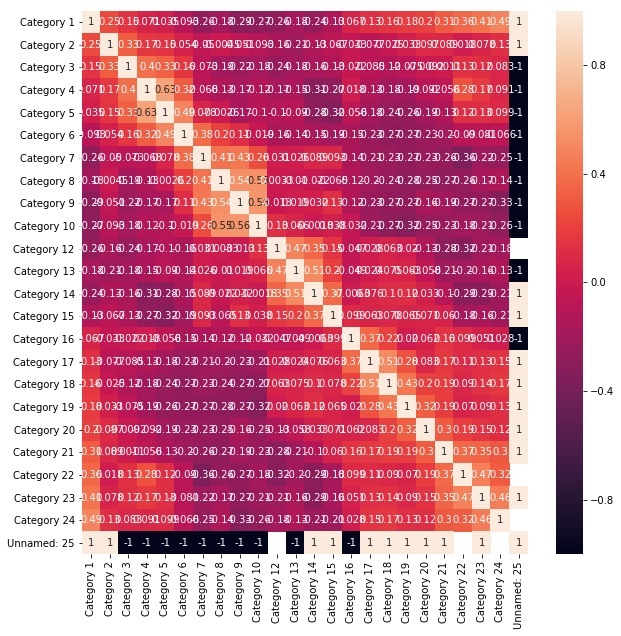

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB112DEE80>]],
      dtype=object)

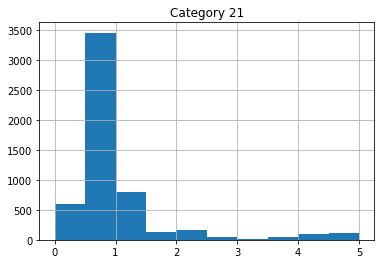

In [11]:
df.hist('Category 21')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB292568D0>]],
      dtype=object)

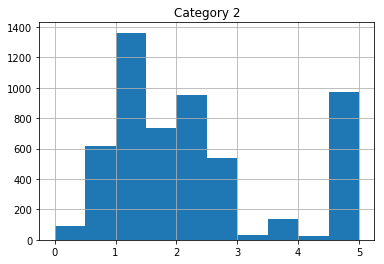

In [13]:
df.hist('Category 2')

C:\Users\Ali Haider\anaconda33\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


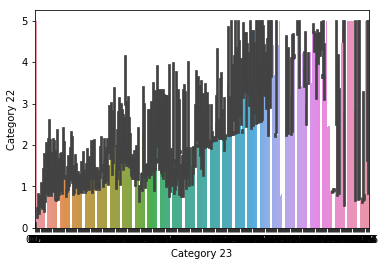

In [12]:
sns.barplot(data= df, x='Category 23', y='Category 22')

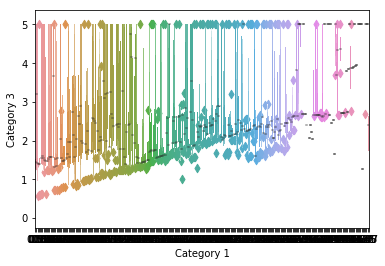

In [14]:
sns.boxenplot(x='Category 1', y='Category 3', data=df)

C:\Users\Ali Haider\anaconda33\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Ali Haider\anaconda33\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Ali Haider\anaconda33\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


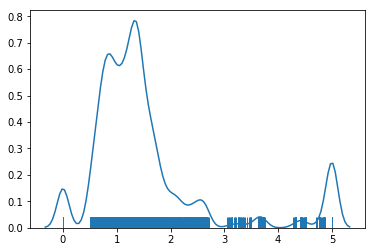

In [16]:
sns.distplot(df[['Category 24']], hist=False, rug=True )

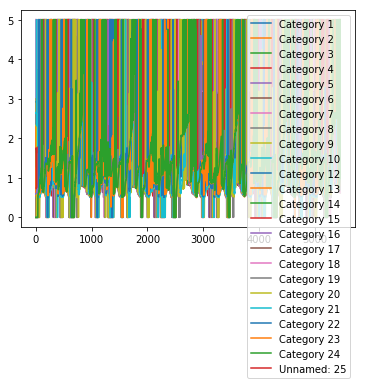

In [17]:
df.plot()

In [4]:
dataset=df.apply(LabelEncoder().fit_transform)

In [5]:
dataset.fillna(df.mean(), inplace=True)

In [6]:
dataset.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,0,0,0,261,236,315,178,283,148,132,...,10,1,0,1,0,0,0,0,0,2
1,1111,0,0,261,236,315,178,283,173,132,...,10,1,0,1,0,0,0,0,0,3640
2,2222,0,0,261,234,315,178,283,173,132,...,10,1,0,1,0,0,0,0,0,3639
3,3333,0,1,261,234,315,178,283,148,132,...,10,1,0,1,0,0,0,0,0,3638
4,4444,0,0,261,234,315,178,283,173,132,...,10,1,0,1,0,0,0,0,0,3637


In [7]:
dataset.rename(columns={'Unnamed: 25': 'label'}, inplace=True)

In [8]:
dataset.head(0)

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,label


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
User           5456 non-null int64
Category 1     5456 non-null int64
Category 2     5456 non-null int64
Category 3     5456 non-null int64
Category 4     5456 non-null int64
Category 5     5456 non-null int64
Category 6     5456 non-null int64
Category 7     5456 non-null int64
Category 8     5456 non-null int64
Category 9     5456 non-null int64
Category 10    5456 non-null int64
Category 11    5456 non-null int64
Category 12    5456 non-null int64
Category 13    5456 non-null int64
Category 14    5456 non-null int64
Category 15    5456 non-null int64
Category 16    5456 non-null int64
Category 17    5456 non-null int64
Category 18    5456 non-null int64
Category 19    5456 non-null int64
Category 20    5456 non-null int64
Category 21    5456 non-null int64
Category 22    5456 non-null int64
Category 23    5456 non-null int64
Category 24    5456 non-null int64
label          545

In [7]:
dataset.describe()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,label
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,2727.500000,93.592009,162.506598,161.548021,147.766312,160.539223,157.027676,180.62335,156.986620,198.166422,...,54.217192,37.402493,29.827896,39.336694,44.446298,42.940616,109.044538,91.873717,95.766862,2727.500000
std,1575.155865,64.429081,103.613915,91.574166,95.538709,108.424654,100.369034,96.90809,92.863721,116.786431,...,56.620469,44.839394,38.507545,58.913518,69.029239,52.724180,118.854462,90.498376,79.109590,1575.155865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1363.750000,43.000000,87.000000,84.000000,64.000000,60.000000,66.000000,80.00000,76.000000,80.000000,...,20.000000,9.000000,4.000000,3.000000,5.000000,8.000000,25.000000,31.000000,39.000000,1363.750000
50%,2727.500000,85.000000,141.500000,136.000000,137.000000,148.000000,154.000000,206.00000,131.000000,179.000000,...,31.000000,25.000000,20.000000,20.000000,20.000000,27.000000,54.000000,59.000000,80.000000,2727.500000
75%,4091.250000,132.000000,219.250000,204.000000,258.250000,285.250000,228.000000,283.00000,228.000000,352.000000,...,67.000000,42.000000,35.000000,37.000000,37.000000,51.000000,158.000000,108.000000,117.000000,4091.250000
max,5455.000000,280.000000,339.000000,327.000000,292.000000,315.000000,309.000000,283.00000,333.000000,352.000000,...,220.000000,189.000000,166.000000,217.000000,254.000000,229.000000,342.000000,307.000000,296.000000,5455.000000


In [9]:
y=dataset.iloc[:,25:26]
y.head()

,label
0,2
1,3640
2,3639
3,3638
4,3637


In [10]:
X=dataset.iloc[:,0:25]
X.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0,0,0,261,236,315,178,283,148,132,...,124,10,1,0,1,0,0,0,0,0
1,1111,0,0,261,236,315,178,283,173,132,...,124,10,1,0,1,0,0,0,0,0
2,2222,0,0,261,234,315,178,283,173,132,...,124,10,1,0,1,0,0,0,0,0
3,3333,0,1,261,234,315,178,283,148,132,...,124,10,1,0,1,0,0,0,0,0
4,4444,0,0,261,234,315,178,283,173,132,...,124,10,1,0,1,0,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

In [13]:

RegressionModels = [
    LinearRegression(),
    RandomForestRegressor(),
    Ridge(),
    ElasticNet(),
    Lasso(),
]

In [16]:
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for i in RegressionModels:
    i.fit(X_train, y_train)
    name = i.__class__.__name__
    print("."*77)
    print(name)
      
    print('Predicted values')
    predictions = i.predict(X_test)
    print(predictions)
    acc = r2_score(y_test,predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    #print(i.coef_)
    #print(i.intercept_)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    
    log_entry = pd.DataFrame([[name, acc * 100]], columns=log_cols)
    log = log.append(log_entry)

print("="*50)

.............................................................................
LinearRegression
Predicted values
[[3135.26879695]
 [2864.65553308]
 [3180.45219828]
 ...
 [3849.19852496]
 [3093.02300268]
 [2039.05525518]]
Accuracy: 21.2510%
Mean Absolute Error: 1164.699635090522
Mean Squared Error: 1928202.5970374716
Root Mean Squared Error: 1388.5973487795054


C:\Users\Ali Haider\anaconda33\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


.............................................................................
RandomForestRegressor
Predicted values
[1033.4 1131.  4642.4 ... 5036.6 5124.2 1522.7]
Accuracy: 98.7807%
Mean Absolute Error: 54.27435897435897
Mean Squared Error: 29854.542802197804
Root Mean Squared Error: 172.78467178021842
.............................................................................
Ridge
Predicted values
[[3135.26878706]
 [2864.65553651]
 [3180.45218732]
 ...
 [3849.19850559]
 [3093.02300676]
 [2039.05525473]]
Accuracy: 21.2510%
Mean Absolute Error: 1164.6996342783034
Mean Squared Error: 1928202.5935462744
Root Mean Squared Error: 1388.5973475224107
.............................................................................
ElasticNet
Predicted values
[3135.24362456 2864.67004076 3180.43752038 ... 3849.10582173 3093.02673705
 2039.05715691]
Accuracy: 21.2517%
Mean Absolute Error: 1164.696366424308
Mean Squared Error: 1928185.9770294507
Root Mean Squared Error: 1388.5913643075312
.....

In [17]:
log

,Classifier,Accuracy
0,LinearRegression,21.251047
0,RandomForestRegressor,98.780723
0,Ridge,21.251047
0,ElasticNet,21.251726
0,Lasso,21.251783
